In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import matplotlib.colors as mcolors
import pandas as pd
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 18})
import json
import glob

def jsonload(fname):
    with open(fname) as jsonfile:
        try:
            return json.load(jsonfile)
        except Exception:
            print(fname)
            
def json_delayscan(indir = ""):
    fdir = f"{indir}"
    fnames = list(np.sort(glob.glob(f"{fdir}/*.json")))
    fnames1 = np.array([y.split(".") for y in [x for x in np.array([x.split("/") for x in fnames])[:,-1]]])[:,0]
    data = [jsonload(fname) for fname in fnames]
    etx_delays = []
    etx_bitcounts = []
    etx_errcounts = []
    for i in range(len(data)):
        for j in range(len(data[i]['tests'])):
            if 'metadata' in data[i]['tests'][j]:
                if "test_io.py::test_eTX_delayscan" in data[i]['tests'][j]['nodeid']:

                    etx_delays.append(data[i]['tests'][j]['metadata']['eTX_delays'])
                    etx_bitcounts.append(data[i]['tests'][j]['metadata']['eTX_bitcounts'])
                    etx_errcounts.append(data[i]['tests'][j]['metadata']['eTX_errcounts'])
    etx_delays = np.array(etx_delays)
    etx_bitcounts = np.array(etx_bitcounts)
    etx_errcounts = np.array(etx_errcounts)
    etx_rate = etx_errcounts / etx_bitcounts
    return fnames1, etx_rate
            
def delay_scan_plots(fname=None,indir=None,boardNum=None,freq=None, ECOND=False):
    
    if ECOND == True:
        boardNum, new_array = json_delayscan(indir)
        for i in range(len(boardNum)):
            fig,ax=plt.subplots(figsize=(7,5))
            a,b=np.meshgrid(np.arange(6),np.arange(63))
            norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 1, vcenter = 0.0001)
            h=plt.hist2d(a.flatten(),b.flatten(),weights=new_array[i].T.flatten(),bins=(np.arange(7)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
            cb=fig.colorbar(h[3])
            cb.set_label(label='Transmission errors rate',size=11)
            plt.title(f"Delay Scan for {boardNum[i]} at {freq} MHz",size=13)
            plt.ylabel('Delay Select Setting', size=13)
            plt.xlabel('Channel Number', size=13)
            plt.savefig(f'./ECOND_delay_scan_{boardNum[i]}_{freq}.png',dpi=300, facecolor = "w")
      
    else: 
        data2 = np.load(f'{indir}/{fname}.npz',allow_pickle=True )
        x = data2['errorcounts']
        y = data2['bitcounts']
        x = x.flatten()[0]
        y = y.flatten()[0]
        new_array = []                                                                                                                                                                                         
        new_array2 = []                                                                                                                                                                                        
        for i in range(6):                                                                                                                                                                                    
           new_array.append(list(np.array(x[i])/np.array(y[i]))) 
        new_array = np.array(new_array)
        fig,ax=plt.subplots(figsize=(7,5))
        a,b=np.meshgrid(np.arange(13),np.arange(63))
        norm = mcolors.TwoSlopeNorm(vmin = 0, vmax = 1, vcenter = 0.0001)
        h= plt.hist2d(a.flatten(),b.flatten(),weights=new_array.T.flatten(),bins=(np.arange(14)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
        cb=fig.colorbar(h[3])
        cb.set_label(label='Transmission errors rate',size=11)
        plt.title(f"Delay Scan for Board {boardNum} at {freq} MHz",size=13)
        plt.ylabel('Delay Select Setting', size=13)
        plt.xlabel('Channel Number', size=13)
        plt.savefig(f'./ECONT_delay_scan_board{boardNum}_{freq}.png',dpi=300, facecolor = "w")
        

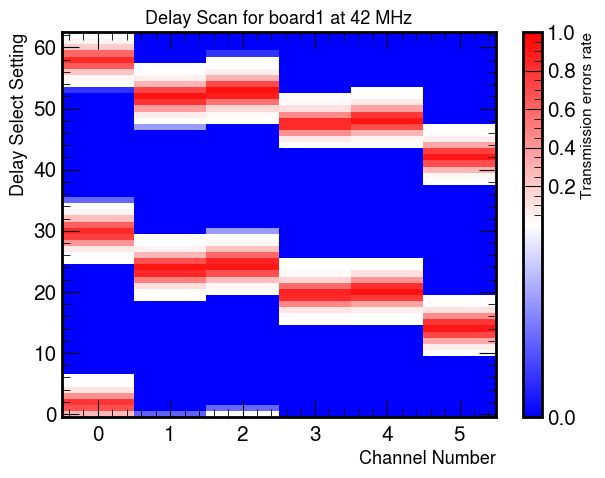

In [40]:
delay_scan_plots(fname=None,indir = "/Users/alexcampbell/Documents/Research/Fermilab/econ_plotting/exampleData",boardNum = None,freq = 42,ECOND=True)